Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "HDFS 22"
COLLABORATORS = "Esteban Braganza y Borja Lopez"

---

# Actividad 2: Streaming - adquisición y análisis de datos

# Introducción

En esta actividad, exploraremos dos de las tecnologías más populares utilizadas para la adquisición y análisis de datos en tiempo real: Apache Kafka y Apache Spark Streaming. A través de una serie de ejercicios, aprenderéis los conceptos básicos de estas tecnologías y cómo usarlas para procesar datos en tiempo real.

## Estructura

Hemos dividido esta actividad en tres partes:

1.  **Introducción a Apache Kafka:** En esta primera parte, aprenderéis los conceptos básicos de Apache Kafka, 
    sus principales componentes y cómo interactuar con ellos utilizando la interfaz de línea de comandos.
2.  **Ingesta de datos con Apache Kafka:** En esta segunda parte, aprenderéis a utilizar Apache Kafka para ingerir
    datos desde un productor y consumirlos desde un consumidor.
3.  **Procesamiento de datos en tiempo real con Apache Spark Streaming:** En esta tercera parte, aprenderéis a usar 
    Apache Spark Streaming para procesar datos en tiempo real provenientes de Apache Kafka.
    

## Notas importantes:

- La actividad debe realizarse en **grupos de 2 miembros**. 
  Asegúrate de saber quién es tu compañero antes de comenzar la actividad.
- Aunque es posible completar las actividades directamente en este cuaderno, 
  **desaconsejamos hacerlo** debido a posibles problemas de rendimiento del servidor. Verás que cada actividad está   contenida en su propia celda, lo que te permitirá copiarla fácilmente a un archivo Python. Este archivo puede ser   **ejecutado en un servidor utilizando SSH o VSCode**. Una vez que hayas ejecutado y probado el script con éxito,   simplemente cópialo de nuevo en la celda correspondiente del cuaderno. Este enfoque garantiza una ejecución más     fluida y una mejor gestión de los recursos del servidor.
- En algunos ejercicios, necesitarás tomar **capturas de pantalla para justificar tus respuestas**. 
  Puedes capturar imágenes utilizando las herramientas del sistema operativo que estés usando: "Recortes" en         Windows, "Imprimir pantalla",\" `Ctrl+C` al seleccionar una imagen, etc. 
  Una vez capturadas, puedes pegar las imágenes directamente en las celdas de respuesta usando `Ctrl+V` o el menú     contextual que aparece al hacer clic derecho, que permitirá pegar la imagen del portapapeles. 
  Para visualizar la imagen, debes ejecutar la celda.
- **Debes utilizar únicamente las bibliotecas proporcionadas, a menos que se indique lo contrario.**
- Por favor, no cambies el nombre del cuaderno ni el tipo de las celdas.



# Parte I: Introducción a Apache Kafka (2 puntos)

[Kafka](https://kafka.apache.org) es una plataforma distribuida para gestionar 
eventos en streaming que nos permite leer, escribir y procesar eventos 
(registros o mensajes, según la terminología de Kafka) distribuidos a lo largo de un clúster.

Comenzaremos la actividad creando un tema llamado `activity2<usuario>`
en el servicio de Kafka de nuestro clúster (sustituye `<usuario>` por tu nombre de usuario). 
Un tema es una colección ordenada de eventos que se almacena de forma persistente, generalmente en disco,
y se distribuye y replica. Kafka trata cada tema en cada partición como un registro 
(un conjunto ordenado de mensajes). Cada mensaje en una partición tiene un desplazamiento único, 
y estos mensajes tienen un período de retención predeterminado de 7 días (604,800,000 ms), 
aunque puedes modificarlo en el momento de la creación del tema.

Kafka funciona basado en [Zookeeper](https://zookeeper.apache.org), que gestiona clústeres 
para proporcionar servicios de coordinación a aplicaciones distribuidas. 
Zookeeper está ubicado en el servidor al que te conectas, es decir, en `localhost`, 
y su puerto es el 2181. Los brokers de Kafka son `Cloudera02` y `Cloudera03`, 
accesibles en el puerto estándar 9092.

## Ejercicio 1: Crear un tema con Kafka (0.25 puntos)

Crea un tema de Kafka llamado `activity2<usuario>` en nuestro clúster con un 
factor de replicación de 1 y una única partición, lo que significa que usaremos 
un solo nodo para almacenar los mensajes que recibe Kafka. 
Además, especifica que los mensajes solo se almacenen durante 2 horas en el tema.

In [3]:
# Pasos Ejercicio 1
!kafka-topics --create --zookeeper Cloudera01:2181/kafka --topic activity2ebraganza --partitions 1 --replication-factor 1

Created topic "activity2ebraganza".


## Ejercicio 2: Lista los temas de Kafka (0.25 puntos)

Consulta el *tema* que acabas de crear y muéstralo.

In [1]:
!kafka-topics --list --zookeeper Cloudera01:2181/kafka


--config
--partition
2
4
AIS_ASOLE
Actactivitat2vribaltag
Actividad10javialonsod4
Actividad_6_1
Activity2jalmandozg
Activity2jalvarezpit
ComptarToots
IBEX_topic
M
Mastodon
MastodonTopic
Mastodon_toots
NombreToots
Original_mastodon_toots
PAC5acrespogut
PAC5ccayuelal
PAC5cmunoznav
PAC5gery14
PAC5polvallescl
PAC5sgarciamars
PACcmunoznav
PEC4sgraul
PEC5_gorkapb
PEC5_josrodand_moilesr
PEC5aaitouaddi
PEC5abourramoussb
PEC5acontrerasga
PEC5acrespogut
PEC5aelimam
PEC5afernandezcampagna
PEC5afrancogranell
PEC5agabrielat
PEC5agarciaherrera
PEC5agarulor
PEC5aherediac
PEC5aleixyebenes
PEC5alejgo06
PEC5alexvidi
PEC5alopezcabe
PEC5anajar
PEC5anavicens
PEC5anavicens_
PEC5arafic
PEC5ariadnaromero
PEC5arigov
PEC5aromerorol
PEC5asalvadory
PEC5asanabriaga
PEC5asanchezlucas
PEC5asantos2
PEC5aurruela
PEC5bgarciadeu
PEC5bmunozh
PEC5carminilevi
PEC5ccampop
PEC5ccayuelal
PEC5cduranmart
PEC5cesar527
PEC5cesariva
PEC5cmtorro
PEC5cnunezari
PEC5cospina
PEC5cospina_cperezceb
PEC5cperezceb
PEC5cperezha
PEC5csantama

mastodon_toots_original
mastodon_toots_original_domain
mastodon_toots_retoot
mastodon_toots_retoot_domain
mastodon_toots_retoots_domain
mastodon_toots_retuited
mastodon_toots_stream
mastodon_topic
mastodon_topics
mastodon_tots
mastodoon_toots
mastondon_toots
matodon_toots
message
messages
mluengo3
monthly-report
mportasa
mriveirocTopic
mstodon_toots
my-topic
my_topic
n
nom_del_tema
o
processed_toots
s
sbenitoiv
sergi
sgr
sgraul
sklymonchuk
subscribe
t
test_topic
toot
toots
toots-topic
toots_topic
topic-name
tweets
uocDemoTopic
uocDemoTopic1
uocDemoTopic2
v
value
y
your_kafka_topic


## Ejercicio 3: Borra el tema de Kafka (0.25 puntos)

Borra el *tema* que creaste en el Ejercicio 1

In [4]:
!kafka-topics --delete --topic activity2ebraganza --zookeeper Cloudera01:2181/kafka 

Topic activity2ebraganza is marked for deletion.
Note: This will have no impact if delete.topic.enable is not set to true.


## Ejercicio 4: Describe el tema de Kafka (0.25 puntos)

Crea el *tema* de nuevo tal y como hiciste en el Ejercicio 1 y utiliza la línea de comandos de kafka para decribirlo.

## En servidor UOC

In [5]:
!kafka-topics --create --zookeeper Cloudera01:2181/kafka --topic activity2ebraganza --partitions 1 --replication-factor 1
!kafka-topics --describe --zookeeper Cloudera01:2181/kafka --topic activity2ebraganza 

Created topic "activity2ebraganza".
Topic:activity2ebraganza	PartitionCount:1	ReplicationFactor:1	Configs:
	Topic: activity2ebraganza	Partition: 0	Leader: 97	Replicas: 97	Isr: 97


## Ejercicio 5: Crea un productor en Kafka (0.5 puntos)

Vamos a crear un evento en el tema. Recuerda que este comando debe ejecutarse
desde la terminal para interactuar. Recuerda usar `CTRL+c` cuando hayas terminado de enviar los mensajes.

In [ ]:
!kafka-console-producer --broker-list Cloudera03:9092 --topic activity2ebraganza

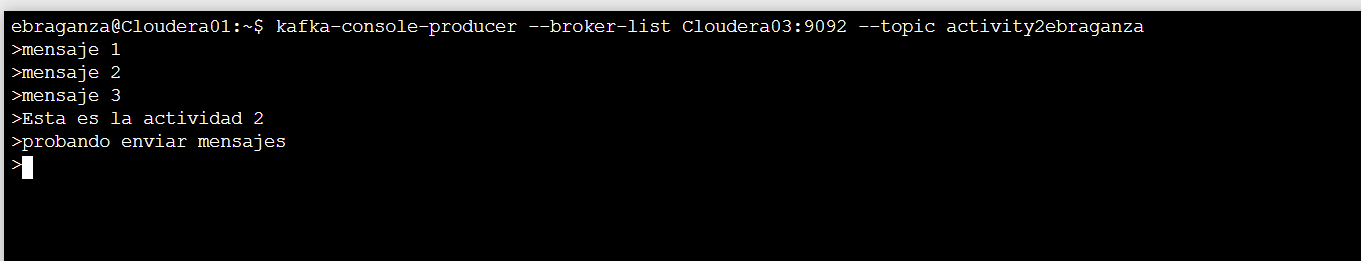

## Ejercicio 6: Crea un consumidor en Kafka (0.5 puntos)

Finalmente, se te pide consultar los mensajes enviados a través de la terminal 
utilizando el consumidor incorporado de Kafka para el tema. Específicamente, debes ejecutar 
un consumidor conectándote a los distintos brokers existentes y especificando el tema 
y la partición a los que se han enviado los mensajes. Puedes abrir dos terminales 
y verificar que los mensajes enviados con el productor al broker pueden ser 
visualizados con el consumidor de consola.

In [ ]:
!kafka-console-consumer --topic activity2ebraganza --from-beginning --bootstrap-server Cloudera03:9092

In [6]:
!kafka-console-consumer --topic activity2ebraganza --from-beginning --bootstrap-server Cloudera03:9092

mensaje 1
mensaje 2
mensaje 3
Esta es la actividad 2
probando enviar mensajes
^C
Processed a total of 5 messages


# Parte II: Ingesta de datos con Apache Kafka (1.5 puntos)

Para automatizar la generación y consumo de datos, es común trabajar 
con un lenguaje de programación como Python, en lugar de hacerlo directamente en Bash. 
En las siguientes preguntas, exploraremos la funcionalidad de Kafka utilizando Python con la biblioteca predeterminada, que **NO DEBES INSTALAR, ya que ya está disponible en la versión correcta**. 
Toda la documentación asociada con la API proporcionada la puedes encontrar en 
[Kafka](https://kafka-python.readthedocs.io/en/master/). Comenzaremos con lo básico que 
ya hemos cubierto: escribir en el tema de Kafka.
Para esto, configuraremos [Kafka
producer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaProducer.html)
que insertará valores numéricos en un tema de Kafka cada 3 segundos. 
Mientras el productor escribe, procederemos a leer los mensajes en la pregunta 8.

## Ejercicio 7: Escribe un tema en Kafka (0.5 puntos)


Se te pide escribir una secuencia numérica de 300 números (del 1 al 300) 
en el tema de Kafka activity2<usuario> que acabamos de crear. Cada uno de 
los mensajes escritos en el tema debe contener información sobre el tema donde se escriben, 
una clave y el valor binario del número a escribir (por ejemplo, value=b'287'). 
Es esencial revisar la API asociada con el 
[Kafka producer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaProducer.html) 
para completar estos ejercicios.

Para guiarte en el ejercicio, te proporcionamos una plantilla que puedes usar para completarlo. Debes completar las partes faltantes del código en la celda de código a continuación.
   

In [ ]:
from kafka import KafkaProducer
import numpy as np
<FILL_IN>
for i in range(1,300):
    <FILL_IN>
producer.flush()

In [7]:
from kafka import KafkaProducer
import json

producer = KafkaProducer(bootstrap_servers='Cloudera03:9092',
                         value_serializer=lambda v: json.dumps(v).encode('utf-8'))
# Enviar mensajes
for i in range(300):
    message = {'message': i}
    producer.send('activity2ebraganza', value=message) 
    print("Mensaje enviado: {}".format(message))

# Cerrar el producer
producer.flush()

Mensaje enviado: {'message': 0}
Mensaje enviado: {'message': 1}
Mensaje enviado: {'message': 2}
Mensaje enviado: {'message': 3}
Mensaje enviado: {'message': 4}
Mensaje enviado: {'message': 5}
Mensaje enviado: {'message': 6}
Mensaje enviado: {'message': 7}
Mensaje enviado: {'message': 8}
Mensaje enviado: {'message': 9}
Mensaje enviado: {'message': 10}
Mensaje enviado: {'message': 11}
Mensaje enviado: {'message': 12}
Mensaje enviado: {'message': 13}
Mensaje enviado: {'message': 14}
Mensaje enviado: {'message': 15}
Mensaje enviado: {'message': 16}
Mensaje enviado: {'message': 17}
Mensaje enviado: {'message': 18}
Mensaje enviado: {'message': 19}
Mensaje enviado: {'message': 20}
Mensaje enviado: {'message': 21}
Mensaje enviado: {'message': 22}
Mensaje enviado: {'message': 23}
Mensaje enviado: {'message': 24}
Mensaje enviado: {'message': 25}
Mensaje enviado: {'message': 26}
Mensaje enviado: {'message': 27}
Mensaje enviado: {'message': 28}
Mensaje enviado: {'message': 29}
Mensaje enviado: {'m

## Ejercicio 8: Leer un tema de Kafka (1 punto)

Usando la biblioteca de Python para Kafka, 
[Kafka](https://kafka-python.readthedocs.io/en/master/),
lee los mensajes enviados en el ejercicio 7, mostrando solo los valores, 
no las otras propiedades del mensaje. Es importante revisar el uso de Kafka en 
([Python](https://kafka-python.readthedocs.io/en/master/usage.html))
y los parámetros del consumidor de 
[Kafka
consumer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaConsumer.html).

Como en el ejercicio anterior, aquí te proporcionamos una plantilla que puedes usar para completar el ejercicio. Debes completar las partes faltantes del código.

In [ ]:
from kafka import KafkaConsumer
<FILL_IN>
for message in consumer:
    <FILL_IN>

In [8]:
from kafka import KafkaConsumer

# Configuración del Consumer
consumer = KafkaConsumer(
    'activity2ebraganza', 
    bootstrap_servers=['Cloudera03:9092'],
    auto_offset_reset='earliest',  # Leer solo ultimos commits
    enable_auto_commit=False,
    consumer_timeout_ms=1000
)

print("Esperando mensajes...")

try:
    for message in consumer:
        if message.value is not None:
            print(message.value)
        else:
            print("Mensaje vacío o no válido recibido.")
    
except Exception as e:
    print("Error al consumir mensajes: {}".format(e))
consumer.close()

Esperando mensajes...
b'mensaje 1'
b'mensaje 2'
b'mensaje 3'
b'Esta es la actividad 2'
b'probando enviar mensajes'
b'{"message": 0}'
b'{"message": 1}'
b'{"message": 2}'
b'{"message": 3}'
b'{"message": 4}'
b'{"message": 5}'
b'{"message": 6}'
b'{"message": 7}'
b'{"message": 8}'
b'{"message": 9}'
b'{"message": 10}'
b'{"message": 11}'
b'{"message": 12}'
b'{"message": 13}'
b'{"message": 14}'
b'{"message": 15}'
b'{"message": 16}'
b'{"message": 17}'
b'{"message": 18}'
b'{"message": 19}'
b'{"message": 20}'
b'{"message": 21}'
b'{"message": 22}'
b'{"message": 23}'
b'{"message": 24}'
b'{"message": 25}'
b'{"message": 26}'
b'{"message": 27}'
b'{"message": 28}'
b'{"message": 29}'
b'{"message": 30}'
b'{"message": 31}'
b'{"message": 32}'
b'{"message": 33}'
b'{"message": 34}'
b'{"message": 35}'
b'{"message": 36}'
b'{"message": 37}'
b'{"message": 38}'
b'{"message": 39}'
b'{"message": 40}'
b'{"message": 41}'
b'{"message": 42}'
b'{"message": 43}'
b'{"message": 44}'
b'{"message": 45}'
b'{"message": 46}'
b'

# Part III: Procesamiento de datos en tiempo real con Apache Spark Streaming (6.5 puntos)

En esta parte de la actividad, nos centraremos en el uso de Apache Spark para procesar datos en tiempo real. Aquí, utilizaremos:

-   [Spark
    Streaming](https://archive.apache.org/dist/spark/docs/2.4.0/streaming-programming-guide.html):
    Spark Streaming es un motor de procesamiento de flujos escalable y tolerante a fallos, 
    construido sobre Apache Spark. Permite el procesamiento de datos en tiempo real con alta capacidad de               rendimiento y baja latencia. Con Spark Streaming, puedes realizar análisis en tiempo real, 
    aprendizaje automático y procesamiento de grafos sobre datos en streaming.
-   [Spark Structured
    Streaming](https://archive.apache.org/dist/spark/docs/2.4.0/structured-streaming-programming-guide.html):
    Structured Streaming es una API de alto nivel para el procesamiento de flujos en Spark. Proporciona una             interfaz declarativa y similar a SQL para procesar datos de streaming estructurados.
    Con Structured Streaming, puedes escribir consultas de streaming que se integran de manera 
    fluida con el procesamiento por lotes, lo que te permite construir pipelines de procesamiento 
    de datos de extremo a extremo.
   

En esta parte de la actividad, nos centraremos en la red social Mastodon para procesar sus datos en streaming. Es una buena idea familiarizarse con la estructura JSON de un "toot".(check the link [Mastodon\'s API
webpage](https://docs.joinmastodon.org/entities/Status/)), para facilitar la comprensión de los diferentes ejercicios que proponemos

**Notas importantes:**

-   Ten en cuenta que, al usar la versión 2.4.0 de Apache Spark, puede haber diferencias en la API y otras características en comparación con las versiones más recientes. Asegúrate de consultar la documentación específica para esa versión cuando necesites más detalles.

-   Recuerda adjuntar una captura de pantalla del resultado de la ejecución de cada ejercicio en esta parte de la actividad.

## Ejercicio 10: Spark Streaming (3.5 puntos)

En este ejercicio, analizarás la actividad en Mastodon contando los toots en una ventana de tiempo. Contar es una de las operaciones fundamentales en Spark, y en esta actividad, aprovecharemos la biblioteca de Spark Streaming para mejorar nuestras capacidades de conteo.

### Ejercicio 10.1: Counting in Windows (0.5 puntos)

Como sabrás, la biblioteca Spark Streaming **procesa los datos utilizando el concepto de time windows**, 
agrupando los elementos de datos según el tiempo en que fueron recibidos. Este enfoque 
permite el procesamiento por lotes de datos de streaming, habilitando análisis **sobre intervalos de tiempo distintos**. Verás que la sintaxis para realizar operaciones sobre los RDDs dentro de estas ventanas de tiempo es **prácticamente equivalente a las operaciones estándar de RDD** que ya conoces.

Completa el código a continuación para obtener **el número de toots originales publicados cada cinco segundos**. Excluye los retweets de tu conteo. Puede que necesites consultar [Mastodon
API](https://docs.joinmastodon.org/entities/Status/) para entender cómo están estructurados los toots.

In [6]:
import findspark
findspark.init()
import json

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils

# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = 'MastodonToots_braganza_lopez'  # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[2]", appName = app_name)
except ValueError:
    sc.stop()
    sc = SparkContext("local[2]", appName = app_name)
sc.setLogLevel("ERROR")

# Create the StreamingContext
batch_interval = 5  # Batch interval in seconds
ssc = StreamingContext(sc, batch_interval)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Define Kafka parameters
kafka_server = "Cloudera03:9092"  # Kafka server address
kafka_topic = ['mastodon_toots']   # Kafka topic
kafka_group = 'braganza_lopez'   # Kafka consumer group, first surname of each member of the group separated by an underscore.

kafkaParams = {
    "metadata.broker.list": kafka_server,
    "group.id": kafka_group
}

# Create a DStream that connects to Kafka
kafkaStream = KafkaUtils.createDirectStream(ssc, kafka_topic, kafkaParams)

# Count each toot as 1 and update the total count
tootCounts = (kafkaStream
              .map(lambda x: json.loads(x[1]))
              .filter(lambda message: message.get('reblog') is None)  # Exclude reblogs (retweets)
              .map(lambda message: ("toot", 1))  # Map each original toot to ("toot", 1)
              .reduceByKey(lambda a, b: a + b)
             )

# Print the cumulative count
tootCounts.pprint()

# Start the computation
try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop()
    sc.stop()

-------------------------------------------
Time: 2024-12-11 16:29:10
-------------------------------------------
('toot', 25)

-------------------------------------------
Time: 2024-12-11 16:29:15
-------------------------------------------
('toot', 37)

-------------------------------------------
Time: 2024-12-11 16:29:20
-------------------------------------------
('toot', 35)

-------------------------------------------
Time: 2024-12-11 16:29:25
-------------------------------------------
('toot', 37)

-------------------------------------------
Time: 2024-12-11 16:29:30
-------------------------------------------
('toot', 33)

-------------------------------------------
Time: 2024-12-11 16:29:35
-------------------------------------------
('toot', 27)

-------------------------------------------
Time: 2024-12-11 16:29:40
-------------------------------------------
('toot', 31)

-------------------------------------------
Time: 2024-12-11 16:29:45
----------------------------------

Añade la captura de pantalla del output **aquí**

### Ejercicio 10.2: Contando Toots por Idioma (0.5 puntos)

Como observaste en el Ejercicio 2.1, el proceso es bastante similar a trabajar con RDDs. 
Ahora, vamos a profundizar en un análisis más complejo al **contar cuántos toots originales se crean 
por idioma cada 5 segundos**. Para mejorar la legibilidad, te solicitamos que ordenes 
los idiomas en orden descendente según el número de toots y limites la salida a los 10 principales idiomas.

In [ ]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils
import json

# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = 'MastodonToots_braganza_lopez'  # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[2]", appName = app_name)
except ValueError:
    sc.stop()
    sc = SparkContext("local[2]", appName = app_name)
sc.setLogLevel("ERROR")

# Create the StreamingContext
batch_interval = 5  # Batch interval in seconds
ssc = StreamingContext(sc, batch_interval)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Define Kafka parameters
kafka_server = "Cloudera02:9092"  # Kafka server address
kafka_topic = ['mastodon_toots']   # Kafka topic
kafka_group = 'braganza_lopez'  # Kafka consumer group, first surname of each member of the group separated by an underscore.

kafkaParams = {
    "metadata.broker.list": kafka_server,
    "group.id": kafka_group
}

# Create a DStream that connects to Kafka
kafkaStream = KafkaUtils.createDirectStream(ssc, kafka_topic, kafkaParams)

# Count the number of toots per language
tootLangCounts = (
    kafkaStream
    .map(lambda message: json.loads(message[1]))
    .filter(lambda message: message.get('reblog') is None) 
    .map(lambda message: (message.get('language'), 1))
    .filter(lambda x: x[0] is not None)
    .reduceByKey(lambda x, y: x + y)
    .transform(lambda rdd: rdd.sortBy(lambda x: x[1], ascending=False))
    )


# Print the cumulative count
tootLangCounts.pprint()

# Start the computation
try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop()
    sc.stop()

-------------------------------------------
Time: 2024-12-11 16:30:15
-------------------------------------------
('en', 30)
('ja', 4)
('de', 2)
('es', 2)
('it', 2)
('ca', 1)
('fr', 1)
('nl', 1)
('uk', 1)
('pt', 1)

-------------------------------------------
Time: 2024-12-11 16:30:20
-------------------------------------------
('en', 27)
('ja', 6)
('de', 3)
('pt', 2)
('es', 1)
('uk', 1)

-------------------------------------------
Time: 2024-12-11 16:30:25
-------------------------------------------
('en', 26)
('ja', 6)
('de', 5)
('tr', 2)
('uk', 2)
('fr', 1)
('es', 1)
('th', 1)

-------------------------------------------
Time: 2024-12-11 16:30:30
-------------------------------------------
('en', 26)
('ja', 8)
('pt', 4)
('es', 3)
('nl', 2)
('fr', 1)
('ar', 1)
('mt', 1)
('de', 1)

-------------------------------------------
Time: 2024-12-11 16:30:35
-------------------------------------------
('en', 19)
('de', 4)
('ja', 2)
('pt', 2)
('es', 2)
('el', 1)
('cs', 1)
('fi', 1)

----------

Añade la captura de pantalla del output **aquí**

### Ejercicio 10.3: Manteniendo el Conteo (0.5 puntos)


Hasta ahora, hemos estado obteniendo resultados específicos de lotes, lo cual es generalmente útil. 
Pero, ¿qué pasa si quieres obtener una visión más amplia, manteniendo la información a través de las 
ventanas para, por ejemplo, acumular tendencias a lo largo del tiempo? 
Ese es el enfoque de nuestra próxima exploración.

En este ejercicio, te invitamos a modificar el script anterior para **mantener un conteo acumulado de todos los toots originales, categorizados por idioma**. En lugar de simplemente contar nuevos toots cada cinco segundos, vamos a **sumarlos continuamente**. Piensa en ello como un marcador que se actualiza constantemente con el número total de toots originales en cada idioma desde el momento en que comenzamos a hacer streaming.

Para lograr esto, trabajaremos con las transformaciones 
[**stateful transformations in Spark Streaming**](https://spark.apache.org/docs/2.4.0/streaming-programming-guide.html#caching--persistence).
Esto es una forma sofisticada de decir que recordaremos los datos pasados y los utilizaremos 
en nuestros cálculos actuales. Es similar a mantener un total acumulado en una variable 
global en lugar de comenzar desde cero cada vez.

**Te invitamos a completar el siguiente script:**

In [1]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils
import json

# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = 'MastodonToots_braganza_lopez'   # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[2]", appName="app_name")
except ValueError:
    sc.stop()
    sc = SparkContext("local[2]", appName="app_name")

sc.setLogLevel("ERROR")

batch_interval = 5  # Batch interval in seconds
ssc = StreamingContext(sc, batch_interval)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Define Kafka parameters
kafka_server = "Cloudera02:9092,Cloudera03:9092"  # Kafka server address
kafka_topic = ['mastodon_toots']   # Kafka topic
kafka_group = 'braganza_lopez'  # Kafka consumer group, first surname of each member of the group separated by an underscore.

kafkaParams = {
    "metadata.broker.list": kafka_server,
    "group.id": kafka_group
}


# Create a DStream that connects to Kafka
kafkaStream = KafkaUtils.createDirectStream(ssc, kafka_topic, kafkaParams)

# Update the cumulative count using updateStateByKey
def updateFunction(newValues, runningCount):
    runningCount = runningCount or 0
    return sum(newValues, runningCount)


# Count each toot as 1 and update the total count
tootCounts = (kafkaStream
    .map(lambda message: json.loads(message[1]))  # Parsear JSON
    .filter(lambda message: message.get('reblog') is None)  # Excluir reblogs
    .map(lambda message: (message.get('language'), 1))  # Idioma como clave
    .filter(lambda x: x[0] is not None)  # Excluir mensajes sin idioma
    .updateStateByKey(updateFunction)  # Estado acumulativo
    .transform(lambda rdd: rdd.sortBy(lambda x: x[1], ascending=False))
             )
              
# Print the cumulative count
tootCounts.pprint()

# Start the computation
try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop()
    sc.stop()

-------------------------------------------
Time: 2024-12-11 16:31:30
-------------------------------------------
('en', 18)
('ja', 4)
('es', 2)
('it', 1)
('fi', 1)
('de', 1)

-------------------------------------------
Time: 2024-12-11 16:31:35
-------------------------------------------
('en', 31)
('ja', 8)
('de', 4)
('es', 3)
('it', 2)
('fi', 1)

-------------------------------------------
Time: 2024-12-11 16:31:40
-------------------------------------------
('en', 46)
('ja', 15)
('de', 7)
('es', 4)
('fi', 2)
('it', 2)
('pl', 1)
('bg', 1)
('zh', 1)

-------------------------------------------
Time: 2024-12-11 16:31:45
-------------------------------------------
('en', 61)
('ja', 18)
('de', 7)
('es', 4)
('it', 3)
('fi', 2)
('pl', 1)
('bg', 1)
('zh', 1)
('uk', 1)

-------------------------------------------
Time: 2024-12-11 16:31:50
-------------------------------------------
('en', 82)
('ja', 21)
('de', 7)
('es', 4)
('it', 4)
('fi', 2)
('bg', 2)
('pl', 1)
('zh', 1)
('uk', 1)

-------

Añade la captura de pantalla del output **aquí**

### Ejercicio 10.4: Windowed Counting (1 punto)

Como has observado, Spark Streaming es increíblemente flexible y 
fácil de usar, y aquí tienes un truco interesante que puede realizar: 
**te permite encontrar un punto intermedio entre contar toots [time
window](https://spark.apache.org/docs/2.4.0/streaming-programming-guide.html#window-operations)
y mantener un total acumulado**. Imaginemos que queremos crear un panel de control, 
como un tablero, que muestre el número de toots realizados en cada idioma. 
El giro es que **queremos que esta actualización ocurra cada 5 segundos, 
pero estamos rastreando los conteos durante un minuto completo**.

Así, cada 5 segundos, nuestro panel se actualiza, proporcionándonos 
el último conteo acumulado durante un minuto. Es como tener un marcador en vivo 
que se actualiza con frecuencia y también realiza un seguimiento de lo que ha ocurrido 
en los últimos 60 segundos, no solo en los últimos 5. De esta forma, obtienes 
tanto actualizaciones inmediatas como una vista más amplia de lo que está ocurriendo, 
todo al mismo tiempo. Muestra solo los 10 principales idiomas.

**Modifica el siguiente script para lograr este objetivo:**


In [1]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils
import json

# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = 'MastodonToots_braganza_lopez'  # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[2]", appName="app_name")
except ValueError:
    sc.stop()
    sc = SparkContext("local[2]", appName="app_name")

sc.setLogLevel("ERROR")

ssc = StreamingContext(sc, 1)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Define Kafka parameters
kafka_server = "Cloudera02:9092,Cloudera03:9092"  # Kafka server address
kafka_topic = ['mastodon_toots'] # Kafka topic
kafka_group = 'braganza_lopez' # Kafka consumer group, first surname of each member of the group separated by an underscore.

kafkaParams = {
    "metadata.broker.list": kafka_server,
    "group.id": kafka_group
}


# Create a DStream that connects to Kafka
kafkaStream = KafkaUtils.createDirectStream(ssc, kafka_topic, kafkaParams)

# Count each toot as 1 and update the total count. Use a 60-second window with a 5-second slide
tootCounts = (kafkaStream
    .window(60, 5)
    .map(lambda message: json.loads(message[1]))  # Parsear JSON
    .filter(lambda message: message.get('reblog') is None)  # Excluir reblogs
    .map(lambda message: (message.get('language'), 1))  # Idioma como clave
    .filter(lambda x: x[0] is not None)  # Excluir mensajes sin idioma
    .reduceByKey(lambda x, y: x + y)          
    .transform(lambda rdd: rdd.sortBy(lambda x: x[1], ascending=False)))

# Print the cumulative count
tootCounts.pprint()

# Start the computation
try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop()
    sc.stop()

-------------------------------------------
Time: 2024-12-11 16:32:23
-------------------------------------------
('en', 9)
('ja', 5)
('nl', 2)
('zh-CN', 2)
('ar', 1)
('fr', 1)
('cs', 1)
('fi', 1)
('zh', 1)
('ru', 1)

-------------------------------------------
Time: 2024-12-11 16:32:28
-------------------------------------------
('en', 28)
('ja', 6)
('de', 3)
('fr', 2)
('nl', 2)
('zh-CN', 2)
('fi', 2)
('ar', 1)
('cs', 1)
('ko', 1)
...

-------------------------------------------
Time: 2024-12-11 16:32:33
-------------------------------------------
('en', 46)
('ja', 16)
('de', 6)
('fr', 3)
('nl', 2)
('zh-CN', 2)
('fi', 2)
('ar', 1)
('cs', 1)
('ko', 1)
...

-------------------------------------------
Time: 2024-12-11 16:32:38
-------------------------------------------
('en', 59)
('ja', 21)
('de', 6)
('fr', 3)
('zh-CN', 3)
('nl', 2)
('pt', 2)
('fi', 2)
('tr', 1)
('ar', 1)
...

-------------------------------------------
Time: 2024-12-11 16:32:43
-----------------------------------------

Añade la captura de pantalla del output **aquí**

### Ejercicio 10.5: Powering Up (1 punto)


Muy bien, ya sabemos que los RDDs en Spark son increíblemente versátiles: 
son como la navaja suiza del procesamiento de datos de stream. Puedes hacer prácticamente 
cualquier operación con ellos. Sin embargo, **a medida que las cosas se vuelven más complejas, 
el desafío aumenta.**

Ahora, vamos a hacer nuestro panel de control aún más interesante. En lugar de solo mostrar 
cuántos toots tenemos por minuto, agreguemos algunas características nuevas. 
¿No sería interesante **rastrear la longitud promedio de estos toots?**
Y hay más: vamos a descubrir **quién es el usuario más seguido entre los que han tooteado en ese minuto.**

Espera, **¡hay más!** Para hacer toda esta información súper fácil de leer y entender, vamos a presentarla en un formato de tabla ordenado y limpio. No se trata solo de los datos, sino de hacerlos amigables para el usuario y visualmente digeribles.

La tabla resultante debe actualizarse en intervalos de 5 segundos, y las ventanas de promedio deben ser de 60 segundos. Las columnas de esa tabla deben ser:
    
-   **`lang`:** Idioma
-   **`num_toots`:** Número de toots originales en ese idioma
-   **`avg_len_content`:** Longitud promedio (en caracteres) del contenido del toot
-   **`user`:** Usuario más seguido
-   **`followers`:** Número de seguidores de ese usuario

Para hacer que la salida sea más legible, limita el número de filas a 10.

**TIP:** Hay un ejemplo muy útil en [Spark
Streaming](https://spark.apache.org/docs/2.4.0/streaming-programming-guide.html#dataframe-and-sql-operations).. ¡Búscalo!



In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import json_tuple, from_json, window, count, avg, col, length, max, first
from pyspark.sql import SparkSession

conf = SparkConf()
conf.setMaster("local[2]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_1" + "ebraganza_blopez" # Replace with your Spark app name must include the username of the members of the group

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define Kafka parameters
kafka_topic = "mastodon_toots"
kafka_bootstrap_servers = "Cloudera02:9092"  # Replace with your Kafka bootstrap servers

# Read a small batch of data from Kafka for schema inference!
batch_df = spark \
    .read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .load()


# Infer schema
schema = spark.read.json(batch_df.selectExpr("CAST(value AS STRING)").rdd.map(lambda x: x[0])).schema

# Create streaming DataFrame by reading data from Kafka
toots = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "latest") \
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_df = toots\
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value"))\
    .select(
        col("parsed_value.language").alias("language"),
        col("parsed_value.content").alias("content"),
        col("parsed_value.created_at").alias("created_at").cast("timestamp"),
        col("parsed_value.account.username").alias("username"),
        col("parsed_value.account.followers_count").alias("followers_count")
    )

agg_df = toots_df \
    .withWatermark("created_at", "1 minute") \
    .groupBy(
        window("created_at", "60 seconds", "5 seconds"),
        "language"
    ) \
    .agg(
        count("*").alias("num_toots"),
        avg(length("content")).alias("avg_len_content"),
        max("followers_count").alias("max_followers"),
        first("username").alias("user")  # Usuario con más seguidores
    ) \
    .select(
        col("language").alias("lang"),
        "num_toots",
        "avg_len_content",
        "user",
        col("max_followers").alias("followers")
    )

try:
    # Write Stream with foreachBatch
    query = agg_df \
        .writeStream \
        .outputMode("complete") \
        .format("console") \
        .option("truncate", False) \
        .option("numRows", 10) \
        .trigger(processingTime="5 seconds") \
        .start()

    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()


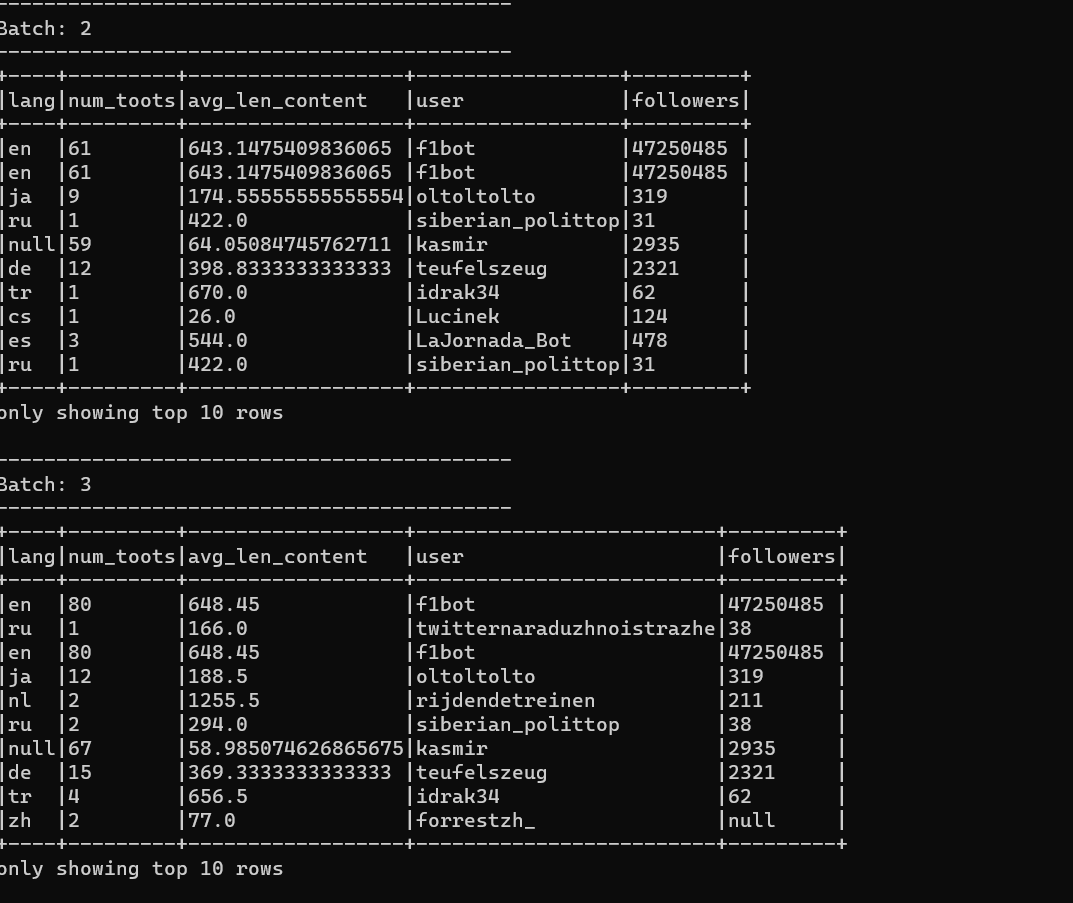Añade la captura de pantalla del output **aquí**

## Ejercicio 11: Structured Streaming (3 puntos)

Como has visto en el último ejercicio, dependiendo de las operaciones, 
la API de Spark Streaming puede no resultar tan conveniente, 
especialmente porque tienes que tratar con APIs de bajo nivel. Afortunadamente, **Spark provides a
high-level API called [Spark Structured
Streaming](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html)** que te permite **expresar los cálculos de streaming de la misma manera que expresarías un cálculo por lotes sobre datos estructurados estáticos**, como los que usarías en el procesamiento por lotes.

En este conjunto de ejercicios, te sumergirás en el fascinante mundo de Spark Structured Streaming.

### Ejercicio 11.1: Getting the Schema (0.5 puntos)

Una de las características más interesantes de Spark Structured Streaming es 
**cómo maneja los datos estructurados**. Por ejemplo, el flujo de datos en nuestro tema de Kafka, 
donde **cada "toot" viene en un formato JSON ordenado**, lo que lo hace estructurado y organizado.

De manera similar a cómo se trabaja con DataFrames en Spark, **Structured Streaming usa esquemas de datos para analizar datos estructurados**, esencialmente un plano de cómo están dispuestos los datos. Para el procesamiento por lotes, Spark puede a menudo deducir esta estructura directamente de los datos. Sin embargo, con los datos de streaming, es un poco diferente: **necesitamos definir esta estructura de antemano.**

En los siguientes ejercicios, utilizaremos un truco conveniente: **en lugar de definir manualmente**
la estructura compleja de un "toot", inicialmente **extraeremos algunos toots de Kafka y los analizaremos en un lote para aprender su esquema**. Es como echar un vistazo para entender cómo están organizadas las cosas. 
Una vez que tengamos el esquema, lo aplicaremos a nuestra pipeline de streaming.

Tu tarea en este ejercicio es realizar esta transformación. Luego, utilizando las operaciones de DataFrame con las que ya estás familiarizado, crearás una tabla con las siguientes columnas que nos permitirá ver los toots individualmente a medida que se procesan:


-   **`id`:** Identificador único para cada toot
-   **`created_at`:** Fecha y hora en que se creó el toot
-   **`content`:** El contenido del toot
-   **`language`:** El idioma del toot
-   **`username`:** El nombre de usuario del autor del toot
-   **`followers_count`:** Número de seguidores del autor.


Recuerda que nos **interesan los toots originales**. Filtra aquellos que son retweets.

Otro aspecto fundamental que debes gestionar aquí es **seleccionar el outputMode adecuado**. Consulta la 
[the documentation](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html#output-modes)
y elige el que mejor se adapte a este ejercicio.


In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import json_tuple, from_json, col
from pyspark.sql import SparkSession

conf = SparkConf()
conf.setMaster("local[2]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_1" + "ebraganza_blopez" # Replace with your Spark app name must include the username of the members of the group

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define Kafka parameters
kafka_topic = "mastodon_toots"
kafka_bootstrap_servers = "Cloudera02:9092"  # Replace with your Kafka bootstrap servers

# Read a small batch of data from Kafka for schema inference!
batch_df = spark \
    .read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .load()


# Infer schema
schema = spark.read.json(batch_df.selectExpr("CAST(value AS STRING)").rdd.map(lambda x: x[0])).schema

# Create streaming DataFrame by reading data from Kafka
toots = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "latest") \
    .load()


# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_df = toots\
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value"))\
    .select(col("parsed_value.id"), col("parsed_value.created_at"), col("parsed_value.content"), col("parsed_value.language"), col("parsed_value.account.username"), col("parsed_value.account.followers_count"))

try:
    # Write Stream with foreachBatch
    query = toots_df \
        .writeStream \
        .outputMode("append") \
        .format("console")\
        .trigger(processingTime="10 seconds") \
        .start()

    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

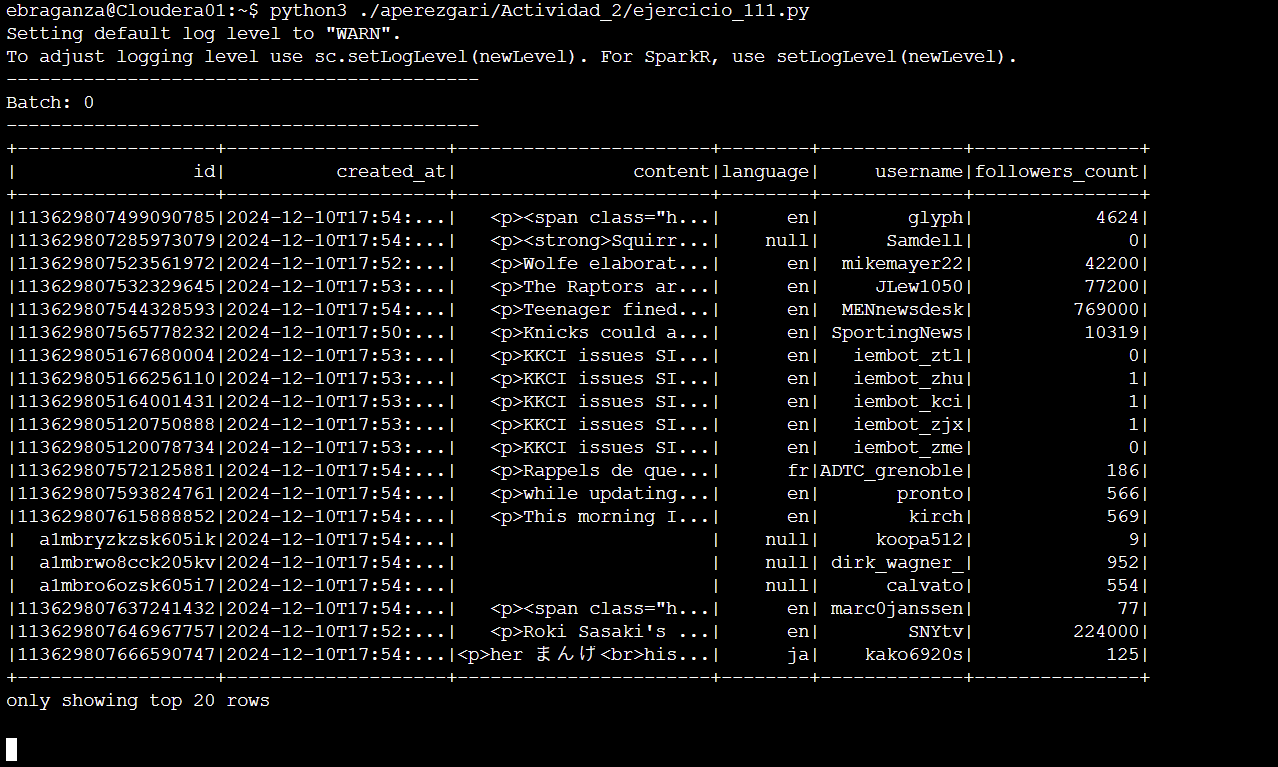

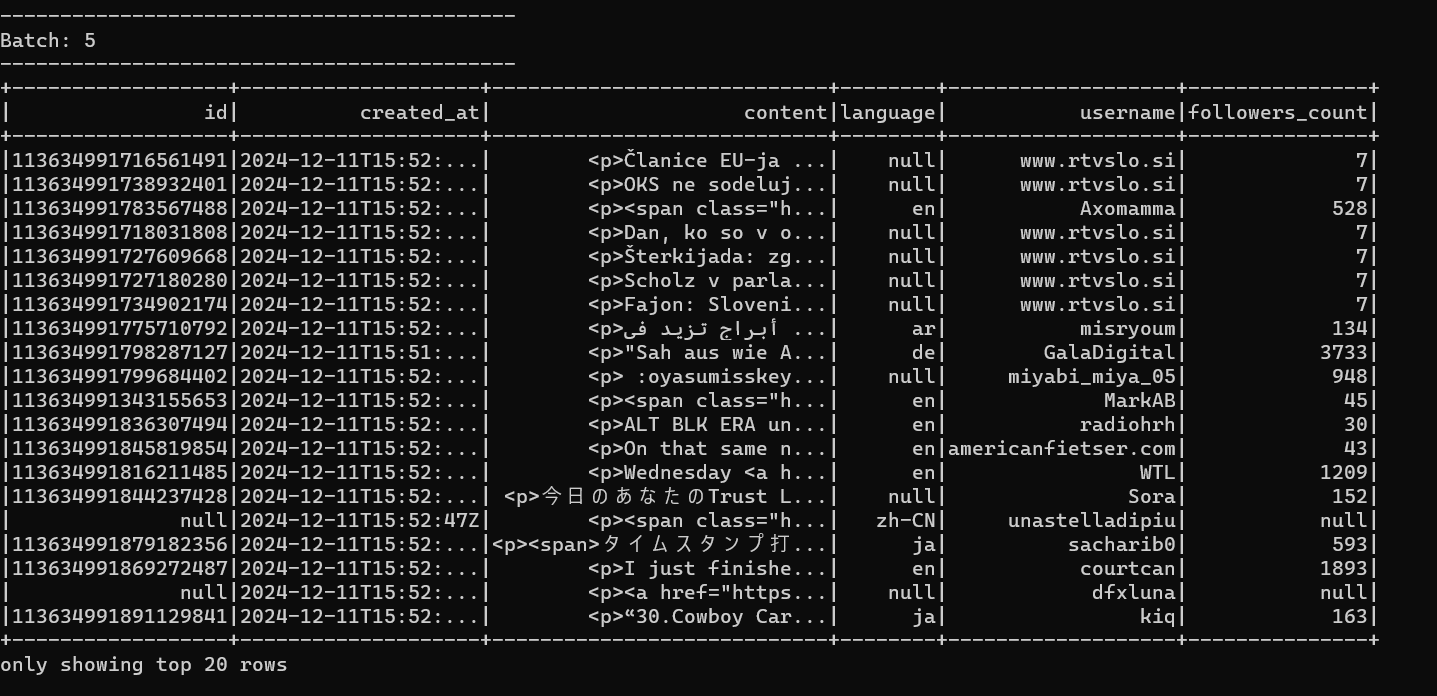

### Ejercicio 11.2: Agregando Datos desde un Flujo (0.5 puntos)

Spark Structured Streaming es realmente poderoso, especialmente cuando se realizan operaciones sobre un flujo continuo de datos. En este ejercicio, profundizaremos en Structured Spark Streaming, enfocándonos específicamente en la agregación de datos desde un flujo de Kafka. Es similar a lo que hicimos en el Ejercicio 2. Tu misión es **contar el número de toots originales en cada idioma.**

Aquí te mostramos cómo debe ser tu salida:

-   **`language`:** Esta columna muestra el idioma de los toots.
-   **`count`:** Aquí es donde mostrarás el número de toots por cada idioma.

Tu tabla debe **acumular estos conteos cada 10 segundos, y también debe seguir acumulándolos**. Además, hazla  amigable para el usuario **ordenando los idiomas por el número de toots, con los idiomas más conversadores en la parte superior.**

Ahora, aquí hay una **parte clave** de este ejercicio: **necesitas elegir el modo de salida adecuado para tu consulta de streaming**. Recuerda, el modo de **salida determina cómo se escribe cada lote de datos resultante en el destino de salida**. Tus opciones son los modos 'Complete', 'Append' y 'Update'. Piensa cuál encaja mejor para nuestro escenario de conteo acumulativo y ordenado. Y **no olvides escribir tu razonamiento en los comentarios.**



In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import from_json, col, window, desc, count
from pyspark.sql import SparkSession

conf = SparkConf()
conf.setMaster("local[2]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_1" + "ebraganza_blopez" # Replace with your Spark app name must include the username of the members of the group

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define Kafka parameters
kafka_topic = "mastodon_toots"
kafka_bootstrap_servers = "Cloudera02:9092"  # Replace with your Kafka bootstrap servers

# Read a small batch of data from Kafka for schema inference!
batch_df = spark \
    .read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .load()

# Infer schema
schema = spark.read.json(batch_df.selectExpr("CAST(value AS STRING)").rdd.map(lambda x: x[0])).schema

# Create streaming DataFrame by reading data from Kafka
toots = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", 'earliest') \
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.

toots_df = toots \
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value")) \
    .filter(col("parsed_value.reblog").isNull() & col("parsed_value.language").isNotNull()) \
    .select(col("parsed_value.language")) \
    .groupBy(col("language")) \
    .agg(count("*").alias("language_count")) \
    .orderBy(col("language_count").desc())

try:
    # Open stream to console (you need to execute it in a terminal to see the output)
    query = toots_df \
            .writeStream \
            .outputMode('complete') \
            .format("console")\
            .trigger(processingTime='10 seconds')\
            .option("numRows", 10)\
            .start()\

    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

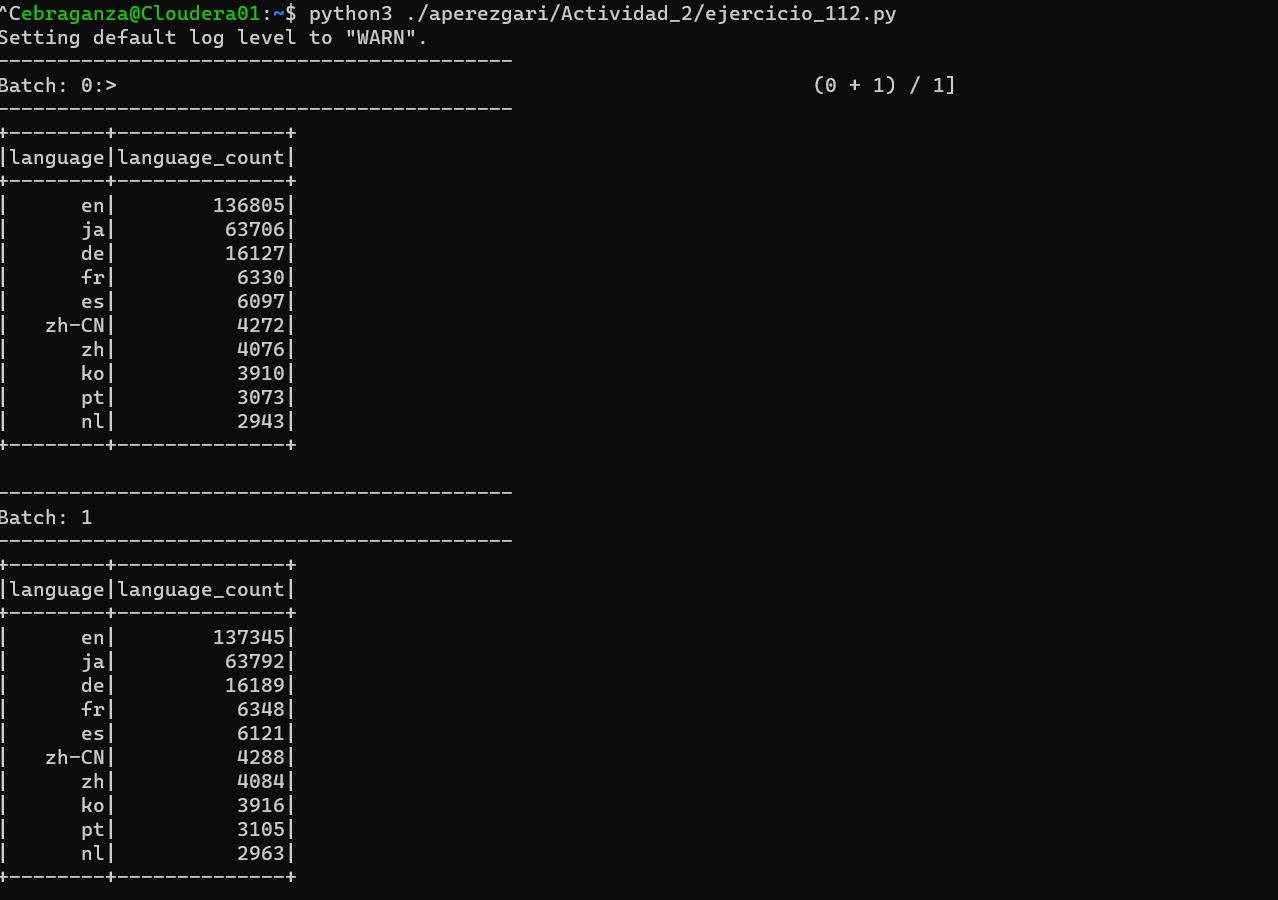

### Ejercicio 11.3: Windowed Counting (1 punto)

¡Buen trabajo! Has aprendido a realizar agregaciones y a hacer un seguimiento de los conteos a lo largo del tiempo. Como notaste en el Ejercicio 2.4, a veces es más efectivo mantener estos conteos en **specific time windows**. Ahora, queremos que apliques esta técnica utilizando [functions available in Spark Structured
Streaming](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html#window-operations-on-event-time). 
Ten en cuenta que Spark Structured Streaming maneja el tiempo de manera diferente a Spark Streaming, por lo que deberás considerar esto al analizar e interpretar los resultados.

Tu tarea es **crear una tabla que muestre un conteo de la cantidad de toots originales (recuerda filtrar los retweets) realizados en cada idioma, segmentados dentro de un marco de tiempo específico.** Para este ejercicio, debes usar una sliding window de un minuto, con los datos refrescándose cada 5 segundos. Este enfoque te permitirá monitorear de cerca la frecuencia de los toots en diferentes idiomas a lo largo de intervalos breves y superpuestos.

Te pedimos que proporciones una tabla con la siguiente estructura:

- **`window`:** Muestra el rango de tiempo
- **`language`:** Esta columna muestra el idioma de los toots.
- **`count`:** Aquí es donde mostrarás el número de toots para cada idioma.

Los resultados deben **ordenarse por time window y conteo en orden descendente.**


In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import json_tuple, from_json, col, window, count
from pyspark.sql import SparkSession

conf = SparkConf()
conf.setMaster("local[2]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_1" + "ebraganza_blopez" # Replace with your Spark app name must include the username of the members of the group

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define Kafka parameters
kafka_topic = "mastodon_toots"
kafka_bootstrap_servers = "Cloudera02:9092"  # Replace with your Kafka bootstrap servers

# Read a small batch of data from Kafka for schema inference!
batch_df = spark \
    .read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .load()

# Infer schema
schema = spark.read.json(batch_df.selectExpr("CAST(value AS STRING)").rdd.map(lambda x: x[0])).schema

# Create streaming DataFrame by reading data from Kafka
toots = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .load()

# Procesar datos con ventana de tiempo
toots_df = toots \
    .select(col("timestamp"), from_json(col("value").cast("string"), schema).alias("parsed_value")) \
    .filter(col("parsed_value.reblog").isNull() & col("parsed_value.language").isNotNull()) \
    .select(col("parsed_value.language"), col("timestamp").cast("timestamp")) \
    .groupBy(
        window(col("timestamp"), "60 seconds", "5 seconds"),
        col("language")
    ) \
    .agg(count("*").alias("toot_count")) \
    .orderBy(col("window"))

try:
    # Open stream to console (you need to execute it in a terminal to see the output)
    # Escribir resultados a la consola
    query = (toots_df.writeStream
        .outputMode("complete")
        .format("console") 
        .option("numRows", 20) 
        .trigger(processingTime="10 seconds") 
        .start())

    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

[]

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

[Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ca', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='en', toot_count=11),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='it', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='tr', toot_count=1),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 20), end=datetime.datetime(2024, 12, 10, 10, 27, 20)), language='ja', toot_count=6),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)), language='en', toot_count=17),
 Row(window=Row(start=datetime.datetime(2024, 12, 10, 10, 26, 25), end=datetime.datetime(2024, 12, 10, 10, 27, 25)),

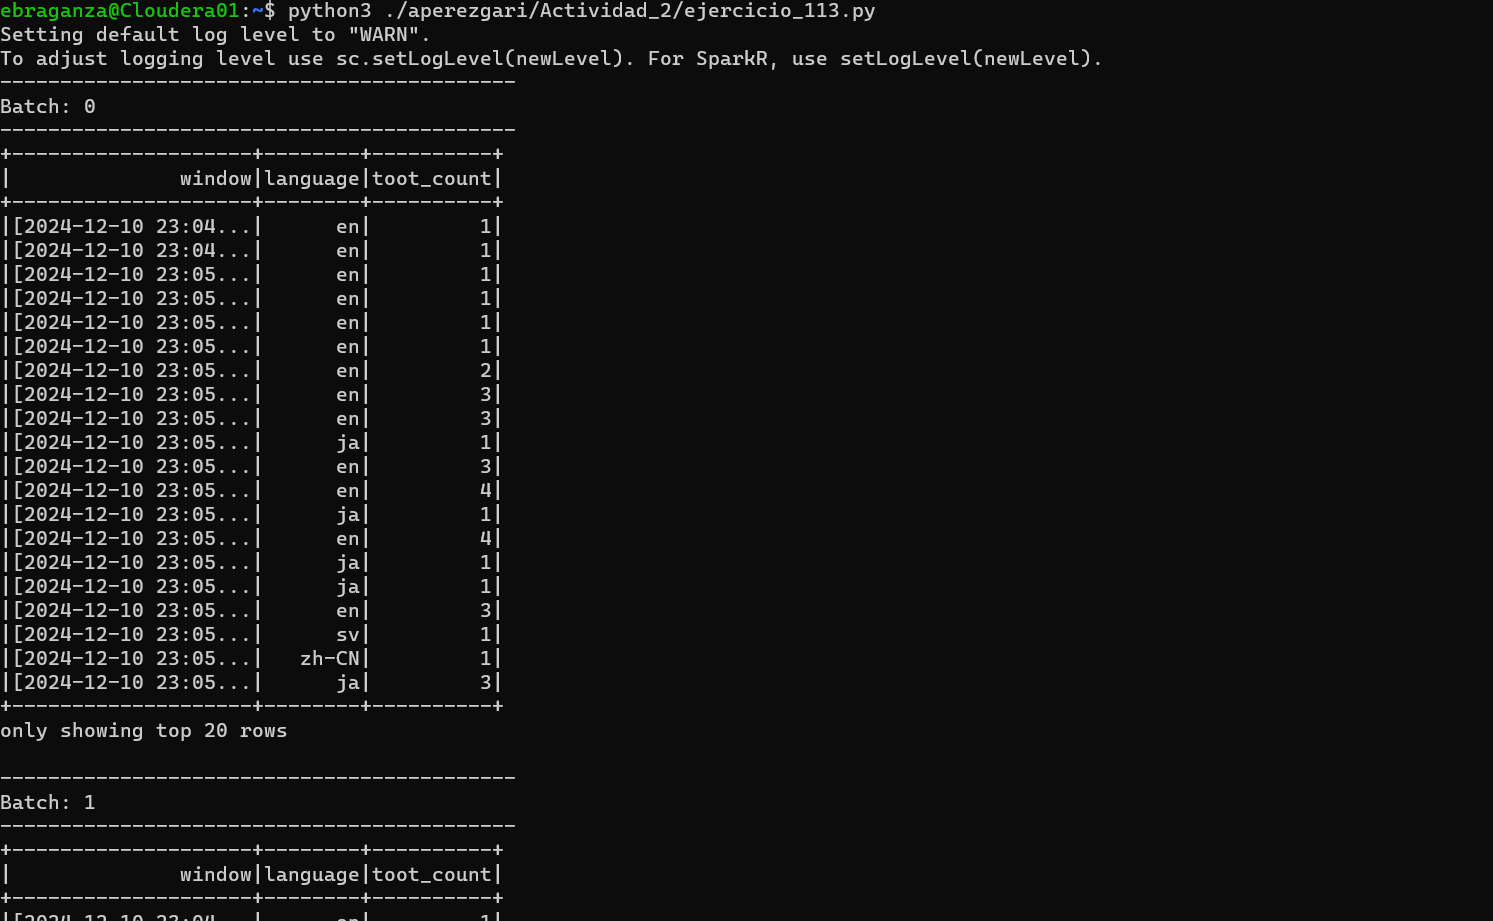

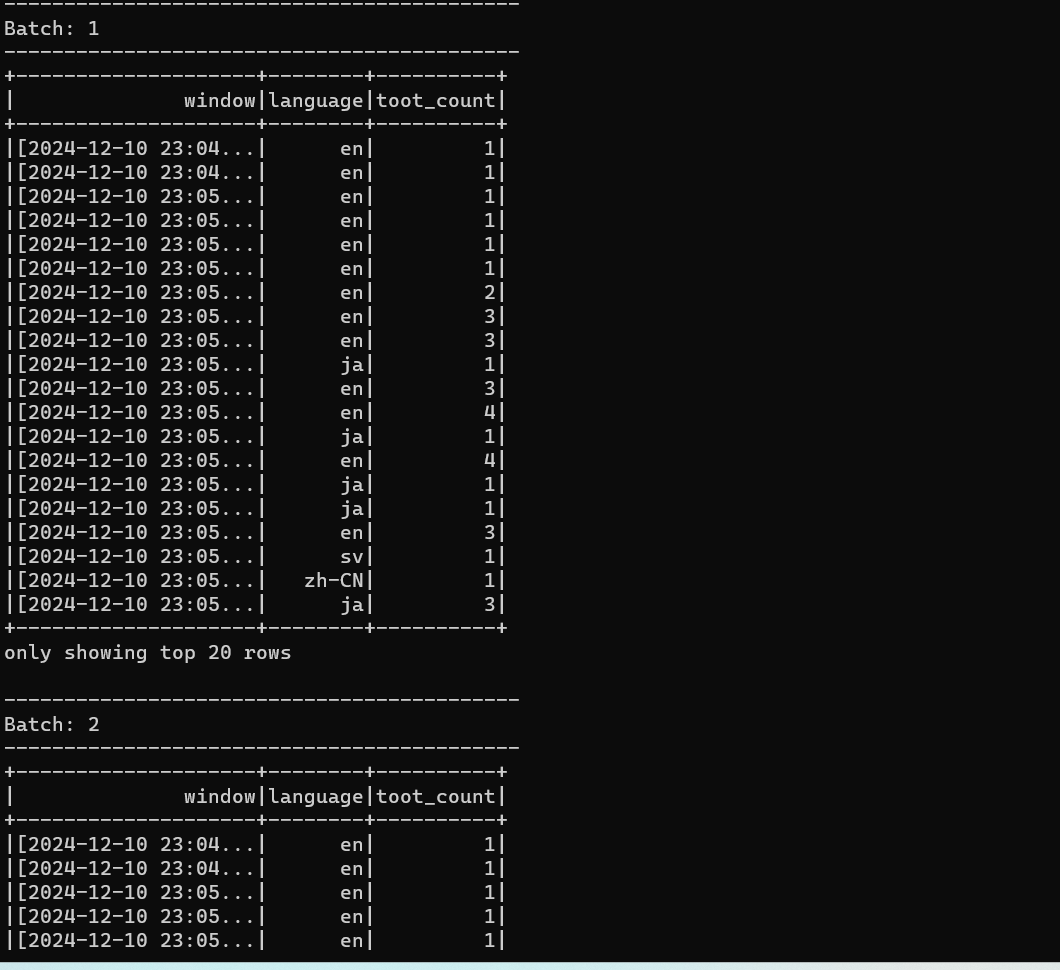

### Ejercicio 11.4: Unir Flujos (1 punto)

En este último ejercicio, exploraremos una característica muy interesante de Spark Streaming que te permite unir 
**[unir dos streams](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html#stream-stream-joins)
y analizarlos!**


Para simplificar las cosas, ya te proporcionamos dos flujos de datos pre-agregados. 
El primero, que se encuentra en el tema de Kafka **`mastodon_toots_original_domain`**, muestra el conteo de toots originales para varias instancias de Mastodon (recuerda que Mastodon es una federación de instancias) durante **fixed one-minute window**. 
El segundo flujo, en el **`mastodon_toots_retoot_domain` topic**,, presenta datos similares, pero para los toots que son retweets (compartidos) de otros toots. Los datos almacenados en los temas de Kafka tienen la misma estructura en formato JSON:

- Una `window` estructura con dos elementos `string` type: `start` and `end` 
- Un componente `string` llamado `mastodon_instance` con el topic.
- Un elemento de tipo `integer` llamado `count` con el número de toots ealizados en ese dominio en el rango de tiempo específico.

Dado que la estructura de los datos es bastante sencilla, esta vez **te pedimos que la definas manualmente**, en lugar de usar el truco de batch. Una vez que hayas configurado las estructuras, **deberás abrir un flujo para cada fuente de Kafka.** El siguiente paso es unir estos flujos. Queremos que realices una **left join del flujo de toots originales con el flujo de retweets**. Después de completar la unión, tu salida debe incluir:


- **`window`:** el rango de tiempo
- **`mastodon_instance`:** el dominio de la instancia de Mastodon
- **`original_count`:** número de toots originales publicados en ese dominio durante ese rango de tiempo
- **`retweet_count`:** número de toots de retweets publicados en ese dominio durante ese rango de tiempo

**TIP**: Realizar una unión en línea de dos flujos no es una tarea fácil, y hay muchas restricciones que debes respetar. 
Lee cuidadosamente [la documentación](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html#stream-stream-joins)
y recuerda que estamos usando la versión 2.4.0. 
Además, recuerda que estamos realizando **join over time**, y este es un componente **clave**. 
Conceptos como los que has aprendido sobre windows son fundamentales junto con conceptos como [watermarking](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html#stream-stream-joins).
Y recuerda, **los modos de salida son complicados** y debes elegir uno que sea adecuado para el trabajo que deseas hacer.


In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField, IntegerType
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import from_json, col, window, to_timestamp, struct
from pyspark.sql import SparkSession

# Initialize Spark Context
conf = SparkConf()
conf.setMaster("local[2]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_4" + "ebraganza_blopez" # Replace with your Spark app name must include the username of the members of the group

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define schema for the incoming data
schema = (StructType([
            StructField("window", StructType([
                StructField("start", StringType(), True),
                StructField("end", StringType(), True)
            ]), True),
            StructField("mastodon_instance", StringType(), True),
            StructField("count", IntegerType(), True)
        ]))

# Define Kafka parameters
toots_original_topic = "mastodon_toots_original_domain"
toots_retoot_topic = "mastodon_toots_retoot_domain"
kafka_bootstrap_servers = "Cloudera03:9092"  # Replace with your Kafka bootstrap servers

# Create streaming DataFrame by reading original toots data from Kafka
toots_original = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", toots_original_topic) \
    .option("startingOffsets", "earliest") \
    .load()


# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_original_df = toots_original\
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value")) \
    .select(
        col("parsed_value.window.start").alias("window_start").cast("timestamp"),
        col("parsed_value.window.end").alias("window_end").cast("timestamp"),
        col("parsed_value.mastodon_instance").alias("mastodon_instance"),
        col("parsed_value.count").alias("original_count")
    ).withWatermark("window_start", "60 minutes")

# Create streaming DataFrame by reading retoots data from Kafka
toots_retoot = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", toots_retoot_topic) \
    .option("startingOffsets", "earliest") \
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_retoot_df = toots_retoot\
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value")) \
    .select(
        col("parsed_value.window.start").alias("window_start").cast("timestamp"),
        col("parsed_value.window.end").alias("window_end").cast("timestamp"),
        col("parsed_value.mastodon_instance").alias("mastodon_instance"),
        col("parsed_value.count").alias("retoot_count")
    ).withWatermark("window_start", "60 minutes")


# Join the two streams
toots_join_df = (toots_original_df.join(
    toots_retoot_df,
    [
        toots_original_df["window_start"] == toots_retoot_df["window_start"],  # Coincidencia de inicio de ventana
        toots_original_df["window_end"] == toots_retoot_df["window_end"],      # Coincidencia de fin de ventana
        toots_original_df["mastodon_instance"] == toots_retoot_df["mastodon_instance"]  # Coincidencia de instancia
    ],
    "left"
    ).select(
        toots_original_df["window_start"].alias("window_start"),
        toots_original_df["window_end"].alias("window_end"),
        toots_original_df["mastodon_instance"].alias("mastodon_instance"),
        toots_original_df["original_count"].alias("original_count"),
        toots_retoot_df["retoot_count"].alias("retoot_count")
    )
)


try:
    # Start running the query that prints the running counts to the console
    query = toots_join_df\
            .writeStream \
            .outputMode("append") \
            .format("console") \
            .trigger(processingTime='60 seconds')\
            .option("numRows", 100)\
            .start()
            #
            
    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

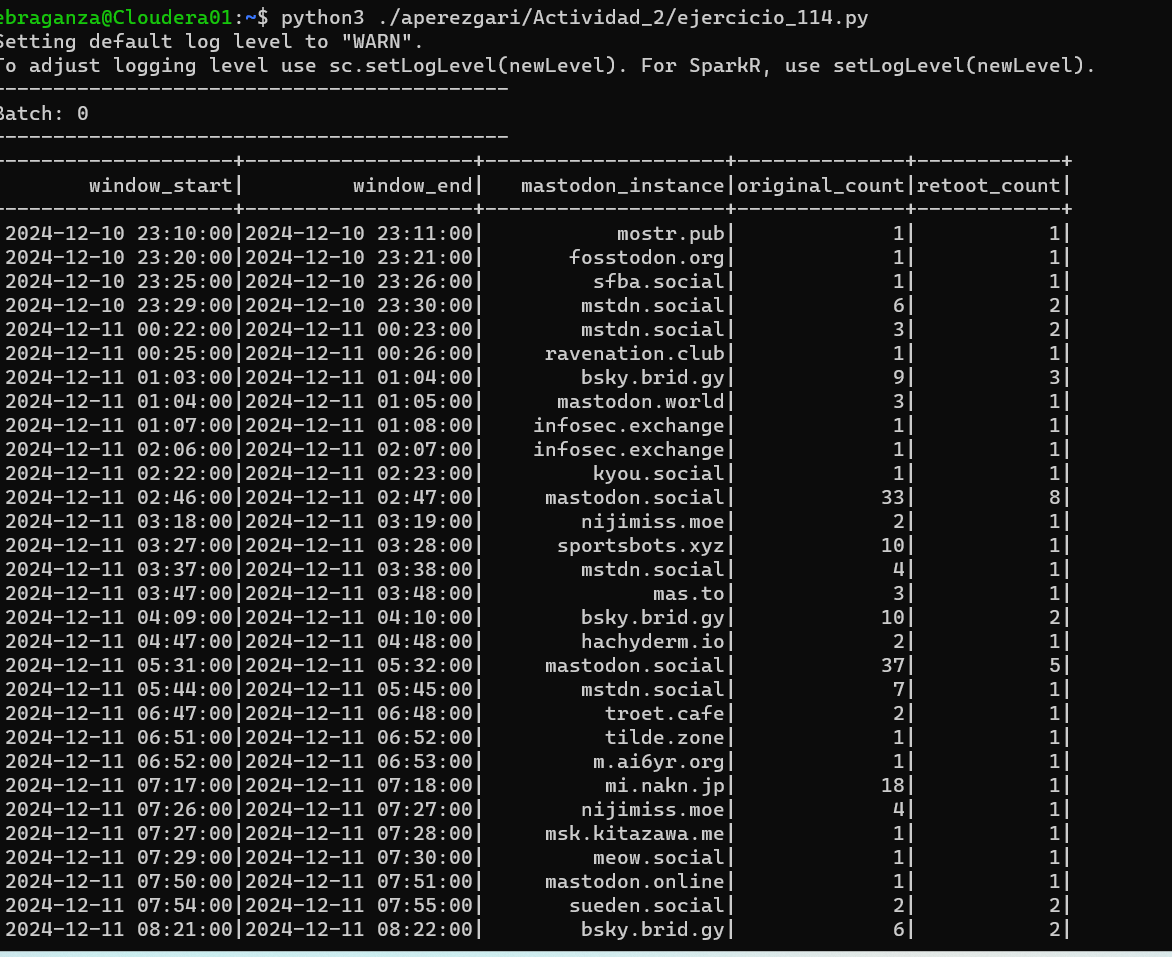

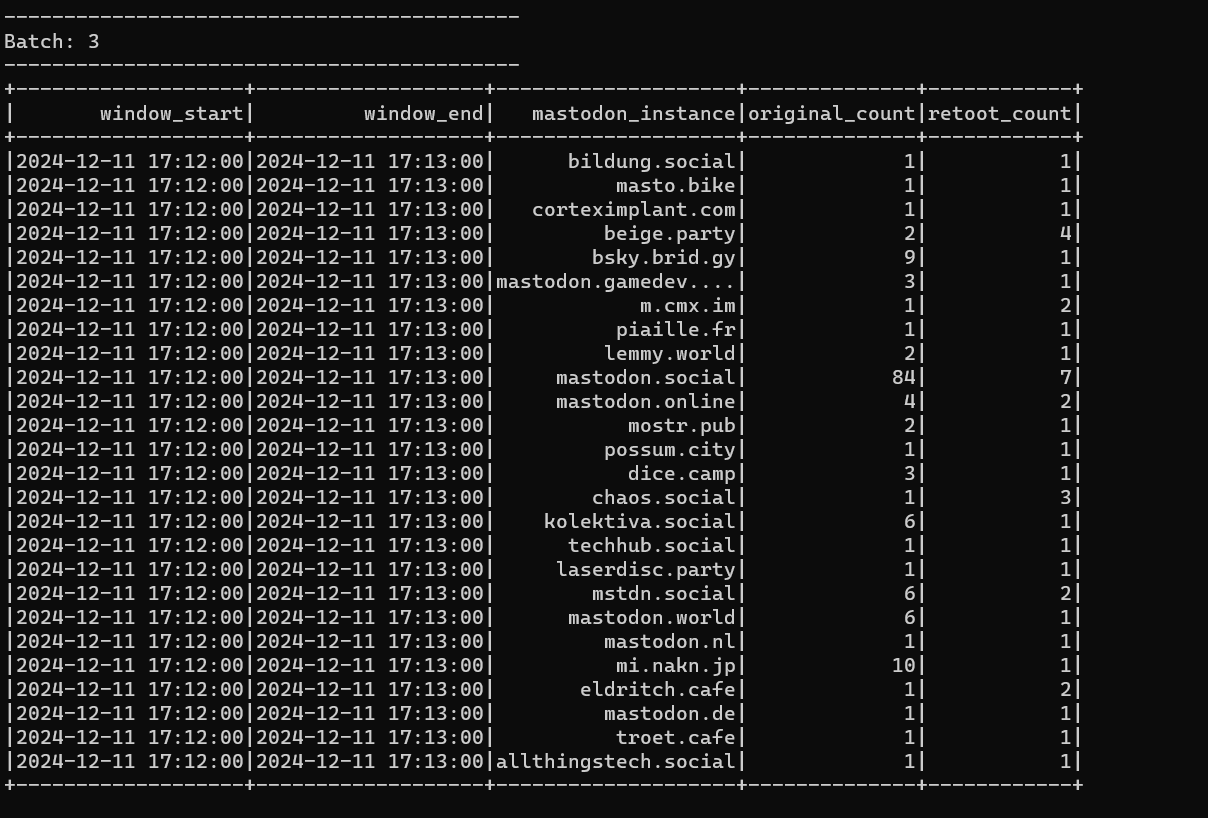

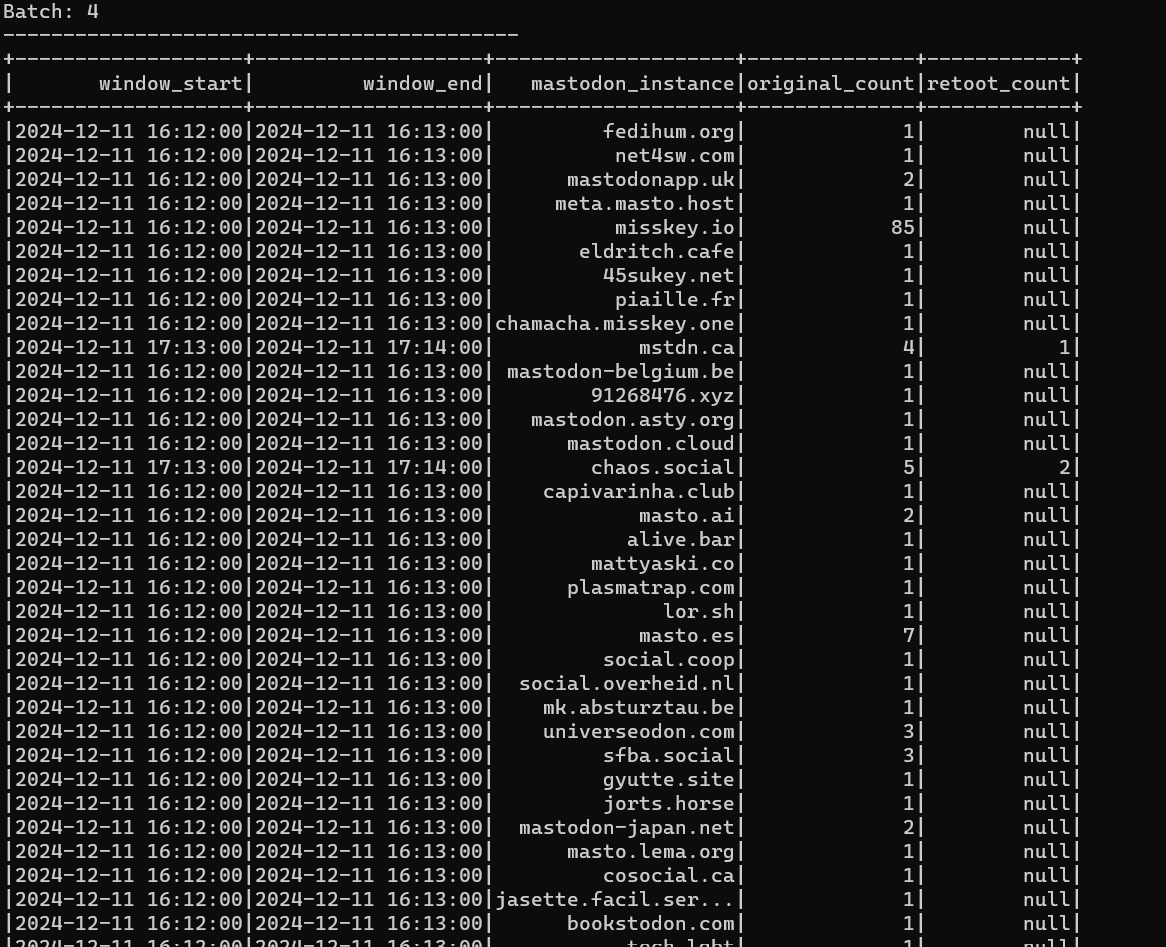